In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import shapiro, kstest, levene, wilcoxon
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['font.size'] = 14  # 设置字体大小为12
plt.rcParams['axes.labelsize'] = 14  # 设置坐标轴标签字体大小
plt.rcParams['xtick.labelsize'] = 14  # 设置横轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14  # 设置纵轴刻度字体大小
plt.rcParams['figure.titlesize'] = 16  # 设置标题字体大小

data = pd.read_csv(r'D:\物联网人工智能\实验1\sales_advert\sales_advert.csv')

In [2]:
'''查看数据'''
data.head()

,revenue,reach,local_tv,online,instore,person,event
0,45860.28,2,31694.91,2115,3296,8,non_event
1,63588.23,2,35040.17,1826,2501,14,special
2,23272.69,4,30992.82,1851,2524,6,special
3,45911.23,2,29417.78,2437,3049,12,special
4,36644.23,2,35611.11,1122,1142,13,cobranding


In [3]:
'''检查数据类型以及是否有缺失值'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   985 non-null    float64
 1   reach     985 non-null    int64  
 2   local_tv  929 non-null    float64
 3   online    985 non-null    int64  
 4   instore   985 non-null    int64  
 5   person    985 non-null    int64  
 6   event     985 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 54.0+ KB


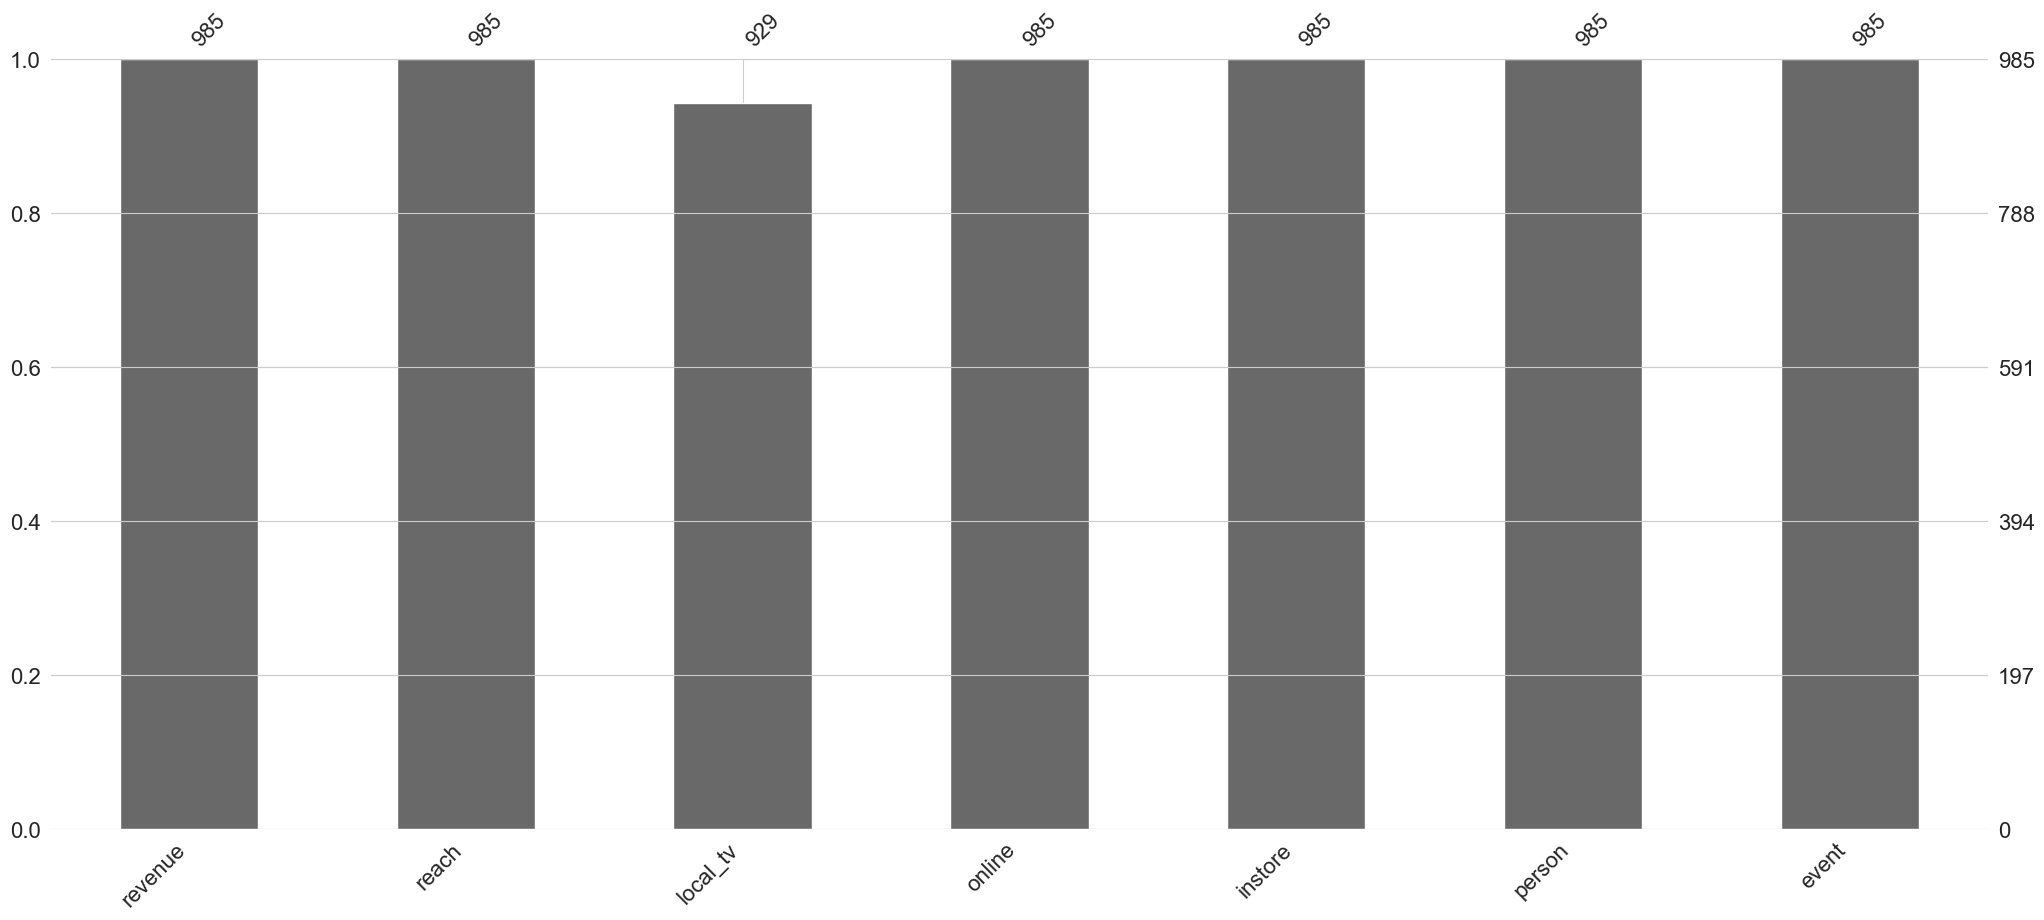

In [2]:
'''绘制缺失值可视化'''
msno.bar(data)
plt.savefig('missing_bar_sales_advert.png', dpi=600)

In [5]:
'''去除缺失值'''
data = data.dropna()

In [6]:
'''连续性描述性统计'''
data.describe()

,revenue,reach,local_tv,online,instore,person
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,38475.476652,3.399354,31324.061109,1595.045210,3374.162540,11.052745
std,11747.868177,1.016480,3970.934733,502.666035,979.219476,3.065101
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30327.080000,3.000000,28733.830000,1250.000000,2727.000000,9.000000
50%,38432.780000,3.000000,31104.520000,1595.000000,3394.000000,11.000000
75%,45901.750000,4.000000,33972.410000,1921.000000,4036.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [35]:
'''离散型描述性统计'''
data.describe(include=[object])

,event
count,929
unique,4
top,cobranding
freq,376


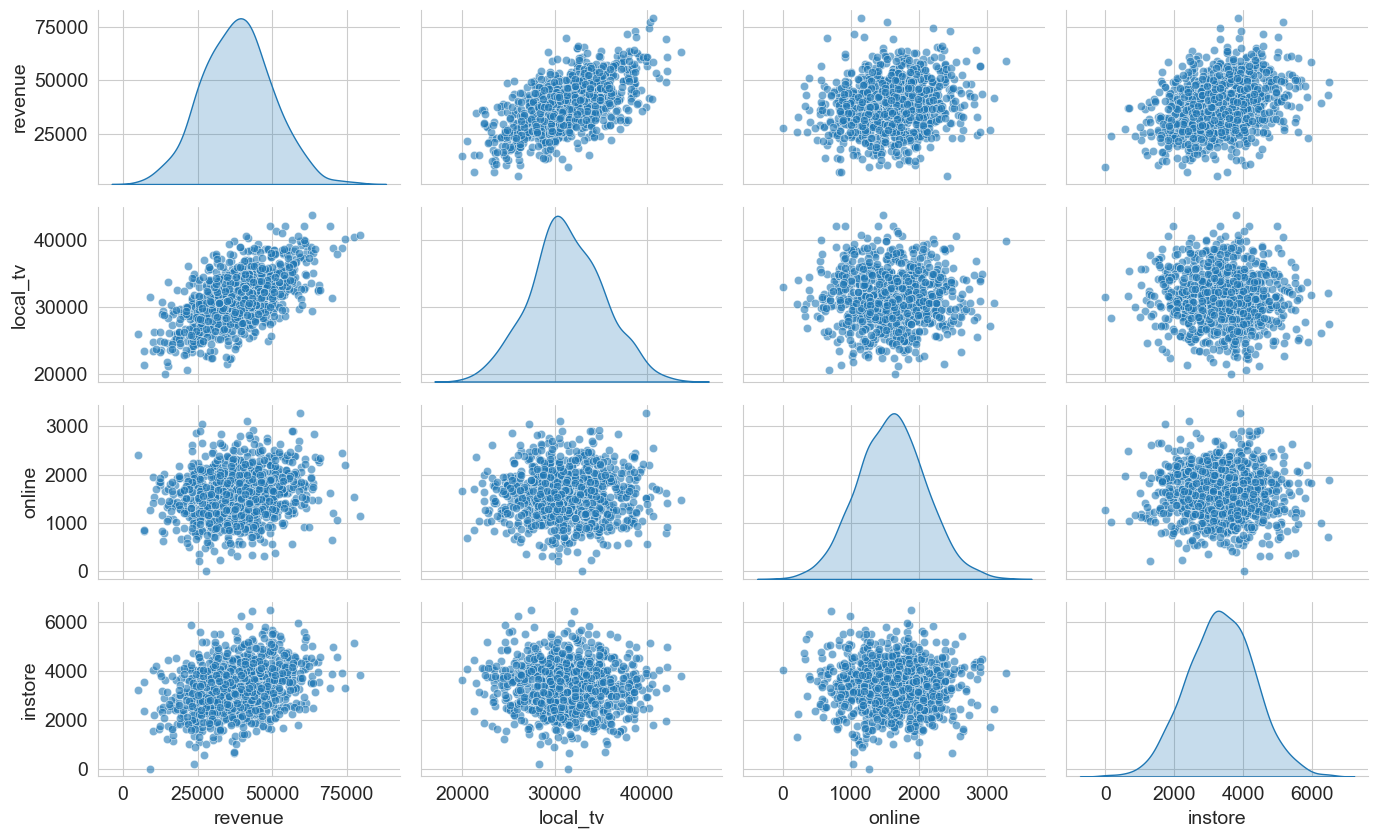

In [3]:
'''绘制两两特征之间的分布关系'''
pairplot = sns.pairplot(
    data[['revenue', 'local_tv', 'online', 'instore']],
    height=2.5,
    diag_kind='kde',  # 对角线绘制 KDE
    plot_kws={'alpha': 0.6}  # 散点透明度
)
pairplot.fig.set_size_inches(14, 8.6)  # 直接设置尺寸
plt.tight_layout()
plt.savefig(r'pairplot_sales_advert.png', dpi=600, bbox_inches='tight')

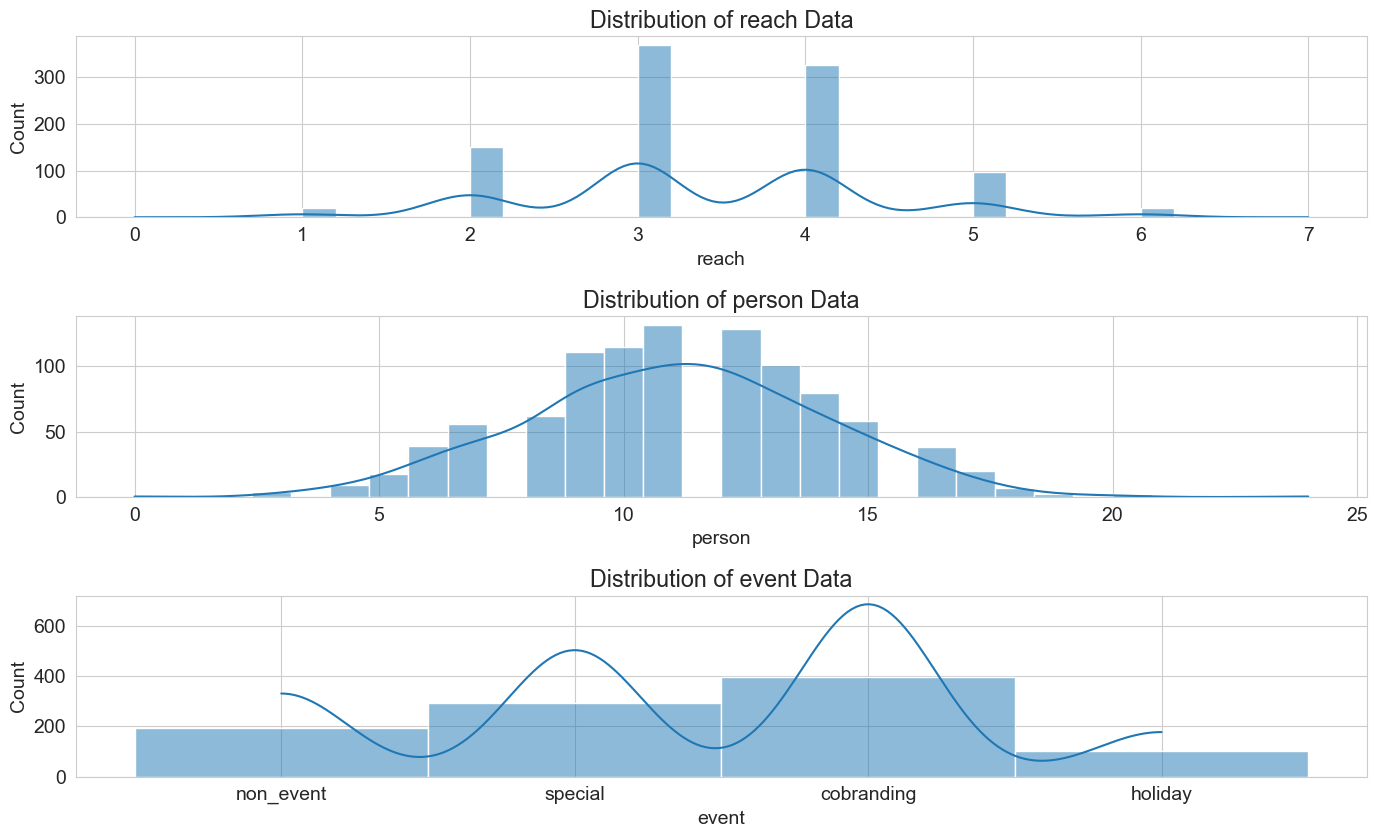

In [4]:
'''绘制分布直方图'''
plt.figure(figsize=(14, 8.6))

# 绘制每列的分布图
for i, col in enumerate(data[['reach', 'person', 'event']], 1):
    plt.subplot(3, 1, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col], kde=True)
    plt.tight_layout()

# 保存整个图像
plt.savefig('distribution_advertising.png', dpi=600)

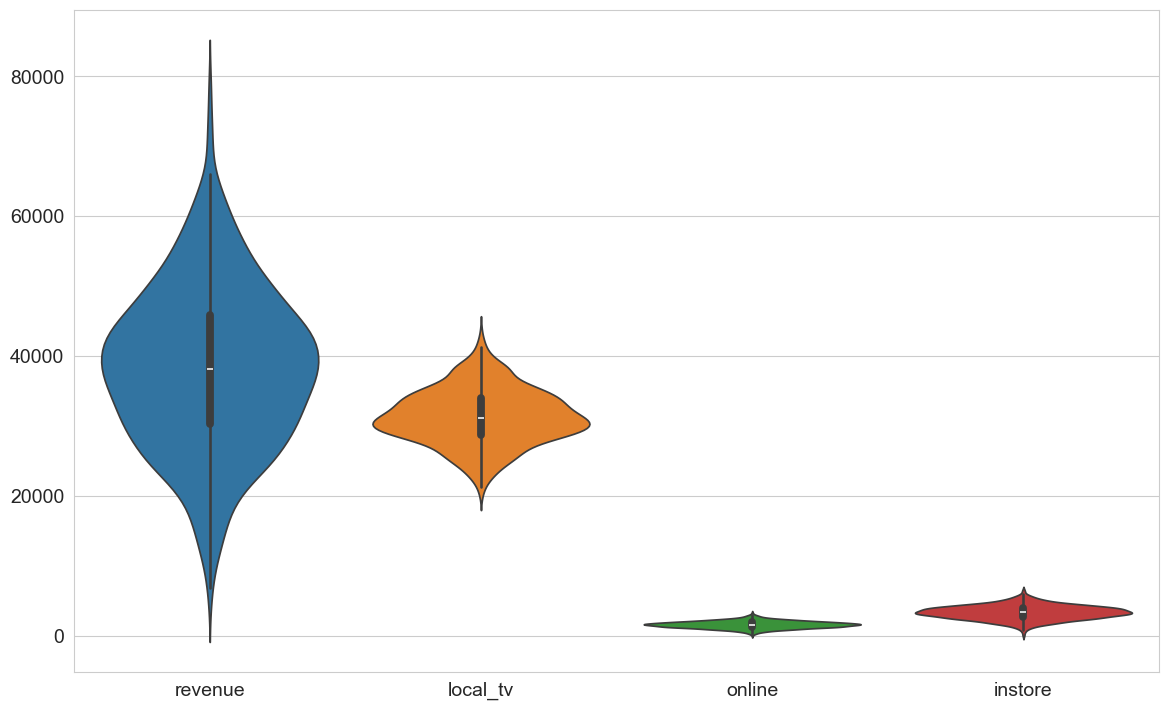

In [5]:
'''小提琴图观察异常值'''
plt.figure(figsize=(14, 8.6))
sns.violinplot(data=data[['revenue', 'local_tv', 'online', 'instore']])
plt.savefig(r'violinplot_sales_advert.png', dpi=600)

In [50]:
'''正态性检验'''


def normality_test(column):
    print(f"\n正态性检验 - {column}")
    stat, p_value = shapiro(data[column])
    print(f"Shapiro-Wilk 检验: 统计量={stat:.4f}, p值={p_value:.4f}")
    stat, p_value = kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
    print(f"Kolmogorov-Smirnov 检验: 统计量={stat:.4f}, p值={p_value:.4f}")


for col in data.columns[:6]:
    normality_test(col)


正态性检验 - revenue
Shapiro-Wilk 检验: 统计量=0.9984, p值=0.5275
Kolmogorov-Smirnov 检验: 统计量=0.0168, p值=0.9512

正态性检验 - reach
Shapiro-Wilk 检验: 统计量=0.9173, p值=0.0000
Kolmogorov-Smirnov 检验: 统计量=0.1996, p值=0.0000

正态性检验 - local_tv
Shapiro-Wilk 检验: 统计量=0.9977, p值=0.2109
Kolmogorov-Smirnov 检验: 统计量=0.0294, p值=0.3918

正态性检验 - online
Shapiro-Wilk 检验: 统计量=0.9992, p值=0.9602
Kolmogorov-Smirnov 检验: 统计量=0.0154, p值=0.9778

正态性检验 - instore
Shapiro-Wilk 检验: 统计量=0.9992, p值=0.9596
Kolmogorov-Smirnov 检验: 统计量=0.0152, p值=0.9800

正态性检验 - person
Shapiro-Wilk 检验: 统计量=0.9897, p值=0.0000
Kolmogorov-Smirnov 检验: 统计量=0.0690, p值=0.0003


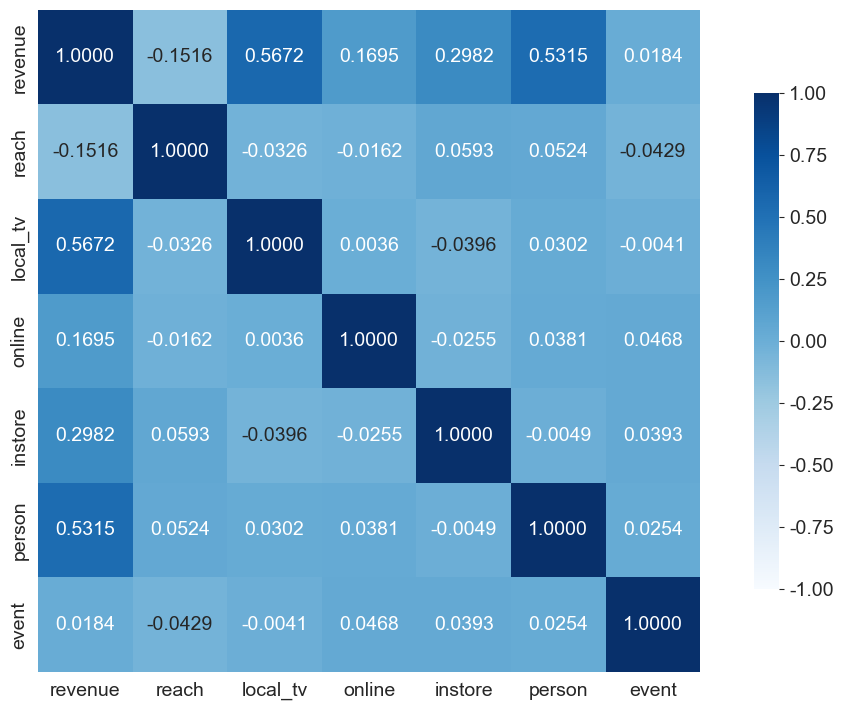

In [7]:
'''相关性分析'''
le = LabelEncoder()
data['event'] = le.fit_transform(data['event'])
spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(14, 8.6))
sns.heatmap(spearman_corr, annot=True, cmap='Blues', fmt=".4f", square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)
plt.savefig(r'spearman_corr_ales_advert.png', dpi=600)

In [47]:
'''方差齐性检验'''
groups = [data[col] for col in data.columns[:6]]
levene_stat, levene_p = levene(*groups)
print(f"Levene 检验: 统计量={levene_stat:.4f}, p值={levene_p:.4f}")  # 方差不齐性

Levene 检验: 统计量=1303.4468, p值=0.0000


In [51]:
'''差异性分析'''
for i in range(5):
    for j in range(i + 1, 6):
        stat, p_value = wilcoxon(data.iloc[:, i], data.iloc[:, j])
        print(f"特征 {data.columns[i]} 与 {data.columns[j]} 的 Wilcoxon 检验: 统计量={stat:.4f}, p值={p_value:.4f}")  # 均差异显著

特征 revenue 与 reach 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 revenue 与 local_tv 的 Wilcoxon 检验: 统计量=66748.5000, p值=0.0000
特征 revenue 与 online 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 revenue 与 instore 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 revenue 与 person 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 reach 与 local_tv 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 reach 与 online 的 Wilcoxon 检验: 统计量=1.0000, p值=0.0000
特征 reach 与 instore 的 Wilcoxon 检验: 统计量=1.0000, p值=0.0000
特征 reach 与 person 的 Wilcoxon 检验: 统计量=72.0000, p值=0.0000
特征 local_tv 与 online 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 local_tv 与 instore 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 local_tv 与 person 的 Wilcoxon 检验: 统计量=0.0000, p值=0.0000
特征 online 与 instore 的 Wilcoxon 检验: 统计量=4689.0000, p值=0.0000
特征 online 与 person 的 Wilcoxon 检验: 统计量=1.0000, p值=0.0000
特征 instore 与 person 的 Wilcoxon 检验: 统计量=1.0000, p值=0.0000


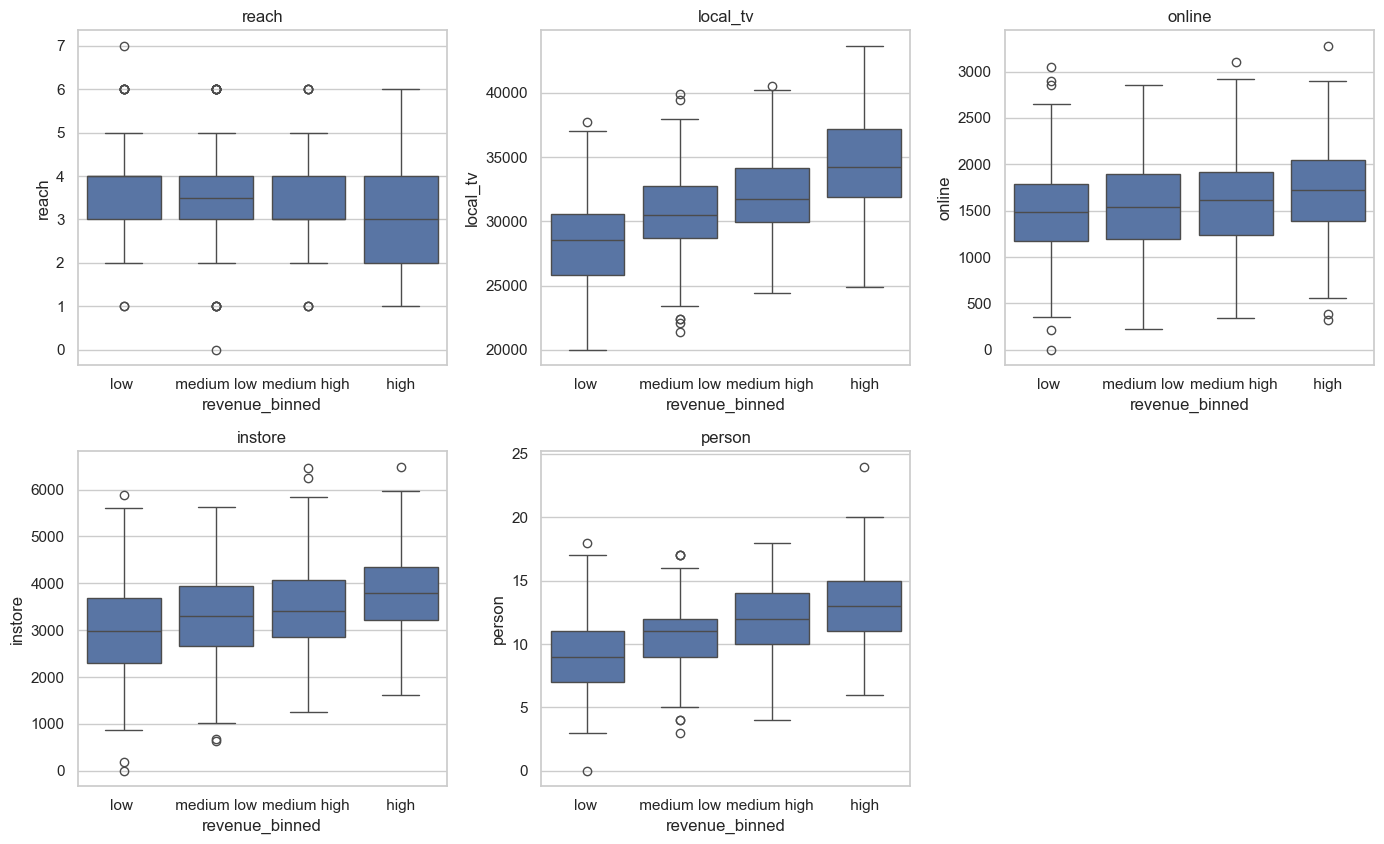

C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_21896\329250787.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_counts = data.groupby(['revenue_binned', 'event']).size().unstack()


<Figure size 1400x860 with 0 Axes>

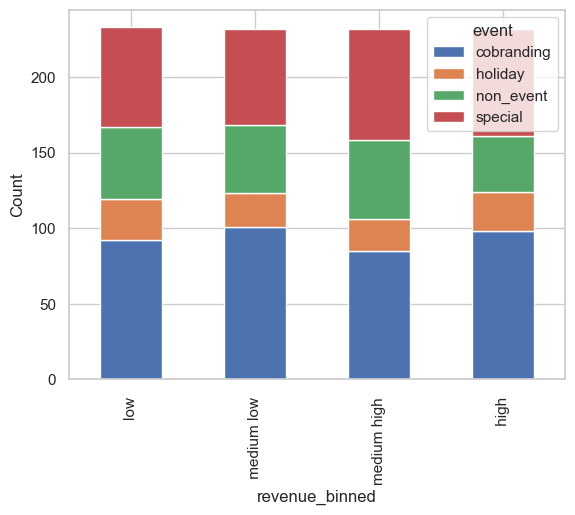

In [8]:
'''检验不同收入分箱下，广告投入是否存在显著差异'''
data = pd.read_csv(r'sales_advert.csv')
data = data.dropna()
# 分箱处理
data['revenue_binned'] = pd.qcut(data['revenue'], q=4, labels=['low ', ' medium low ', 'medium high ', ' high '])

# 设置绘图风格
sns.set(style="whitegrid")

# 1. 数值型特征分布差异（箱线图）
numeric_features = ['reach', 'local_tv', 'online', 'instore', 'person']
plt.figure(figsize=(14, 8.6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='revenue_binned', y=feature, data=data)
    plt.title(f'{feature}')
plt.tight_layout()
plt.savefig(r'数值型特征分布差异.png', dpi=600)
plt.show()

# 2. 分类变量分布差异（堆叠条形图）
plt.figure(figsize=(14, 8.6))
event_counts = data.groupby(['revenue_binned', 'event']).size().unstack()
event_counts.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.savefig(r'分类变量分布差异.png', dpi=600)
plt.show()

In [67]:
'''不同分箱的统计检验'''
# 1. 分类变量分析（卡方检验）
# 表明 event 与 revenue_binned 之间没有显著关联，营销活动类型（event）对收入分箱的影响不显著
contingency_table = pd.crosstab(data['revenue_binned'], data['event'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Test for Event:\n p-value = {p:.4f}')

# 2. 数值变量分析（ANOVA）
# 表明这些特征在不同收入分箱下的均值存在显著差异，这些数值特征对收入分箱的影响显著
anova_results = {}
for feature in numeric_features:
    groups = [data[data['revenue_binned'] == bin][feature] for bin in data['revenue_binned'].cat.categories]
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[feature] = p_val

print("\nANOVA Results:")
for feat, p in anova_results.items():
    print(f"{feat}: p-value = {p:.4f}")

Chi-Square Test for Event:
 p-value = 0.7145

ANOVA Results:
reach: p-value = 0.0000
local_tv: p-value = 0.0000
online: p-value = 0.0000
instore: p-value = 0.0000
person: p-value = 0.0000


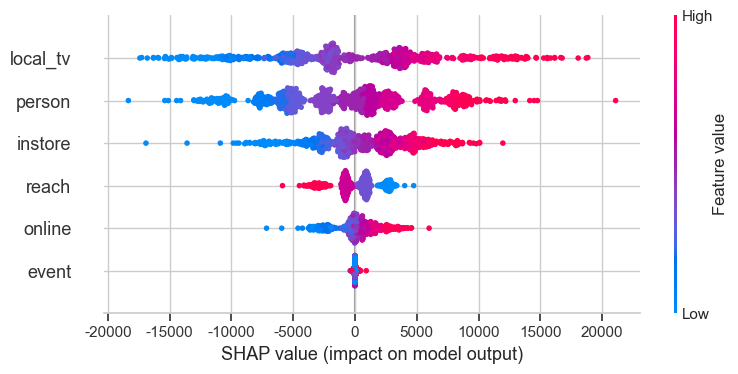

In [73]:
'''特征重要性'''
from sklearn.ensemble import GradientBoostingRegressor
import shap

model = GradientBoostingRegressor()
data = pd.read_csv(r'sales_advert.csv')
data = data.dropna()
le = LabelEncoder()
data['event'] = le.fit_transform(data['event'])
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
model.fit(X, y)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)  # 蜂群图

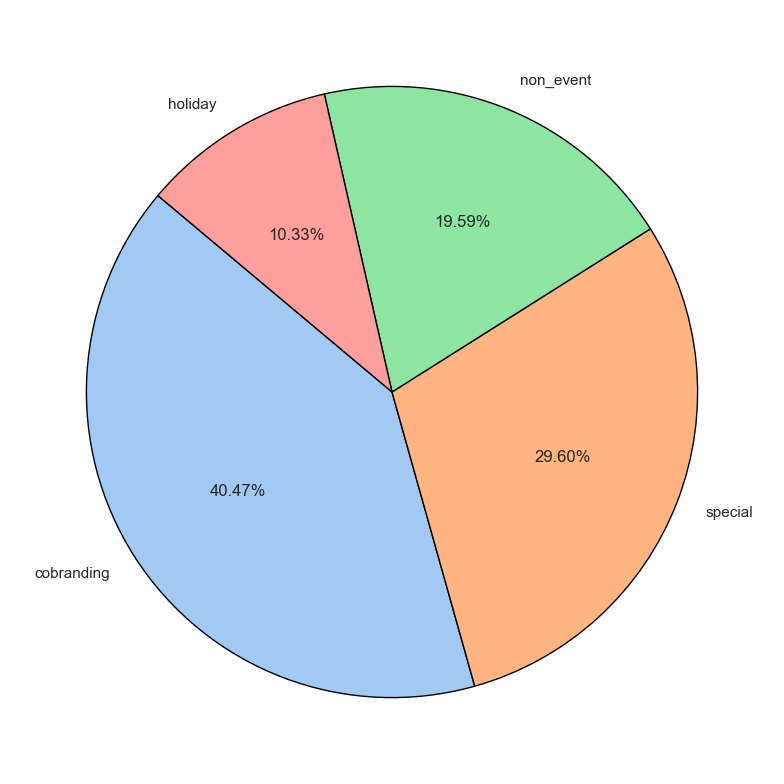

In [9]:
'''划分训练集和测试集'''
data = pd.read_csv(r'sales_advert.csv')
data = data.dropna()
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# 计算每个类别的数量
class_counts = y.value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig(r'pic.png', dpi=600)
plt.show()


正在训练 Linear Regression 模型...
最佳参数：{}

正在训练 Lasso 模型...
最佳参数：{'alpha': 0.0001}

正在训练 Ridge 模型...
最佳参数：{'alpha': 0.43287612810830617}

正在训练 ElasticNet 模型...
最佳参数：{'alpha': 0.000774263682681127, 'l1_ratio': 0.09}
                                                         Best Params  \
Linear Regression                                                 {}   
Lasso                                              {'alpha': 0.0001}   
Ridge                                 {'alpha': 0.43287612810830617}   
ElasticNet         {'alpha': 0.000774263682681127, 'l1_ratio': 0.09}   

                           MAE              MSE       R^2  
Linear Regression  4301.132099  27213386.791831  0.785801  
Lasso              4301.132091  27213386.772167  0.785801  
Ridge              4301.490798  27216626.214022  0.785775  
ElasticNet         4301.565845  27217311.838448   0.78577  


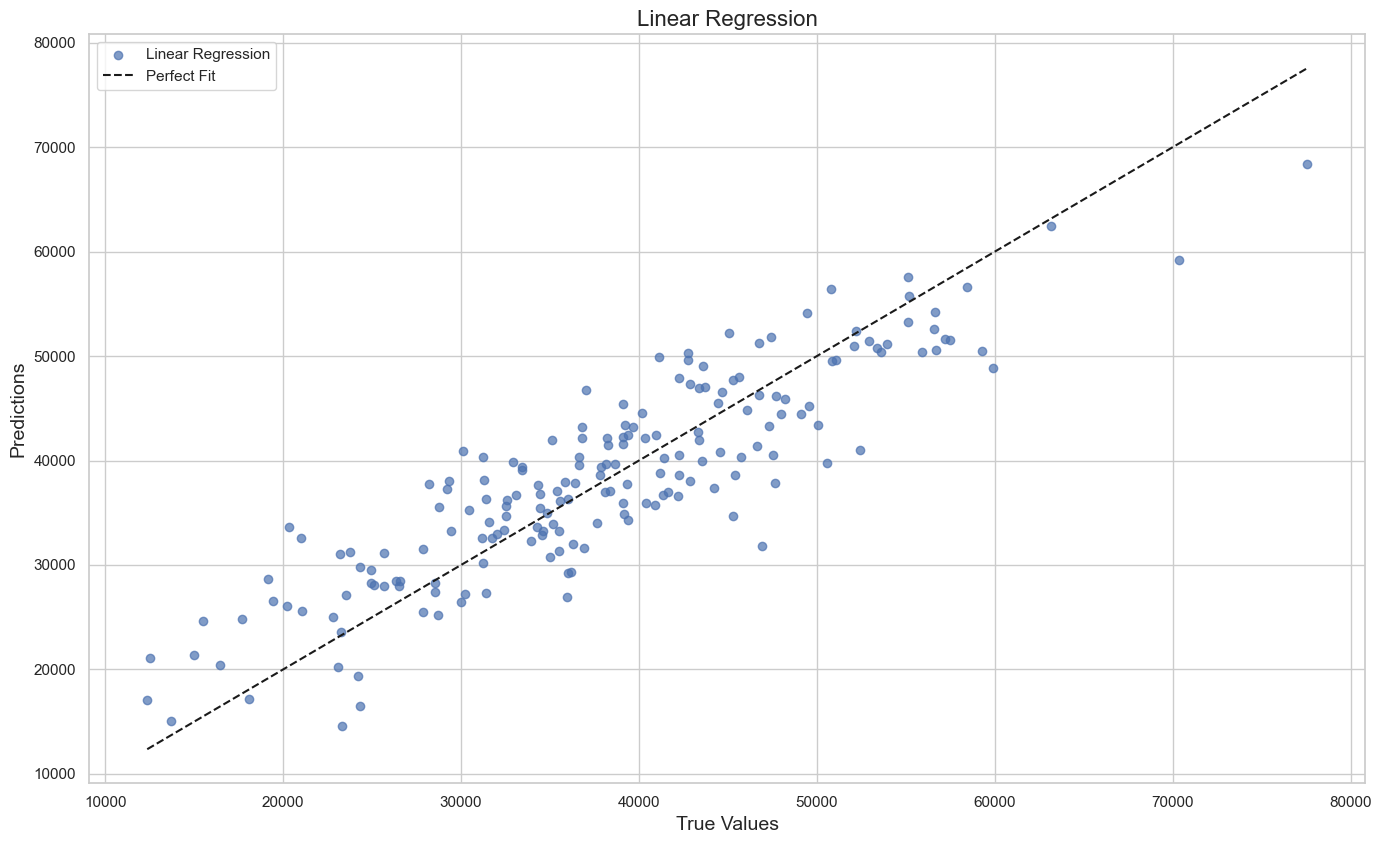

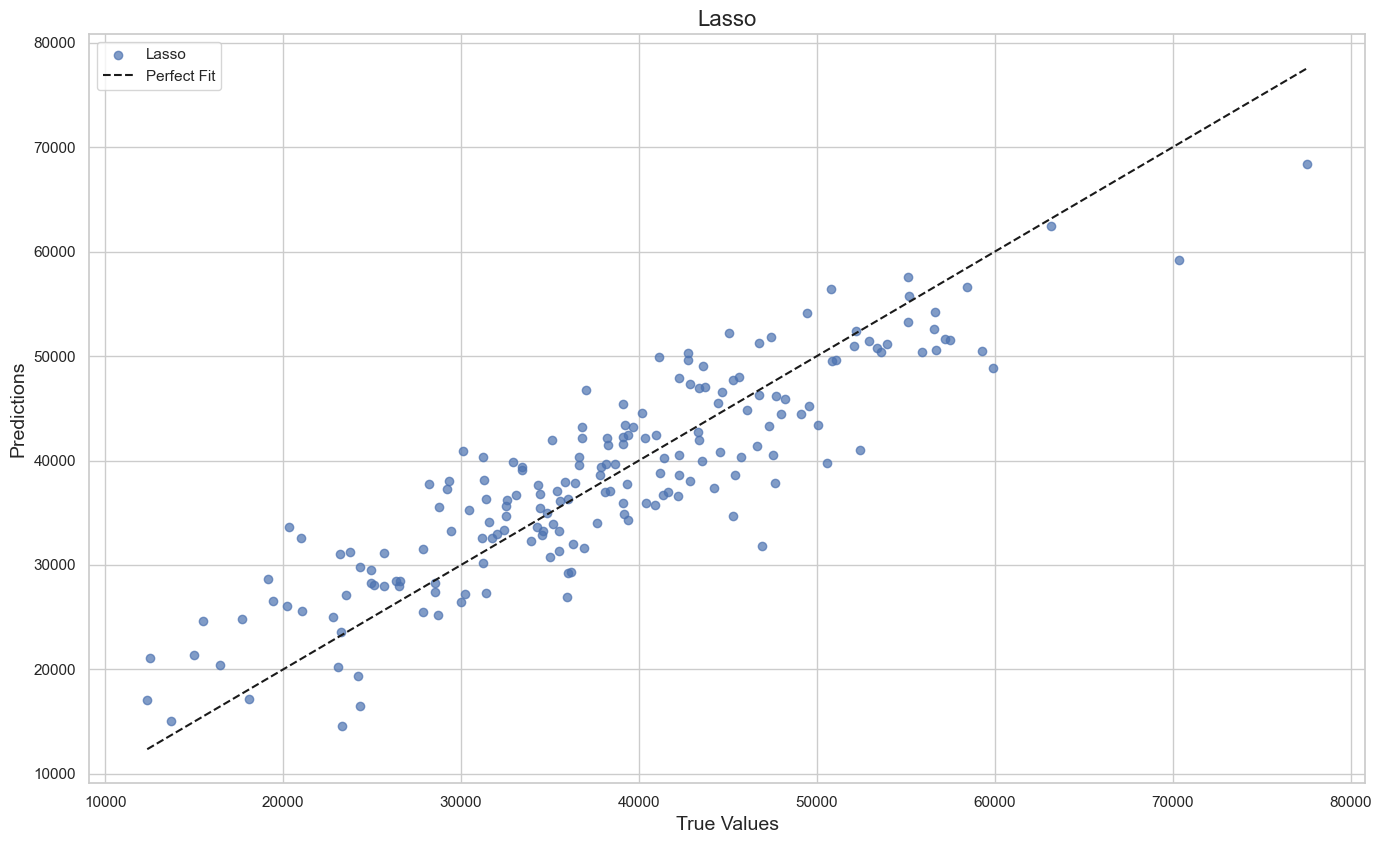

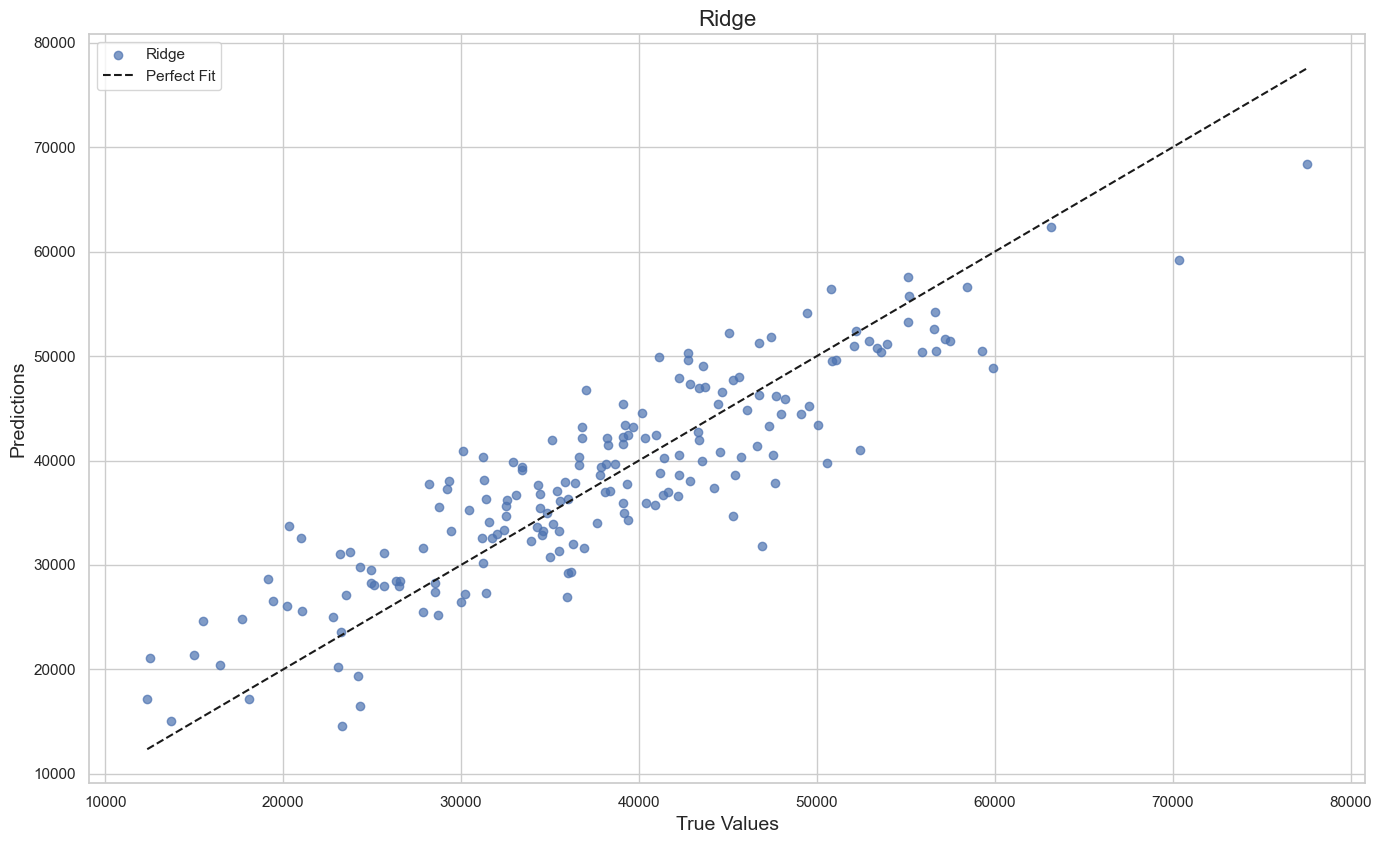

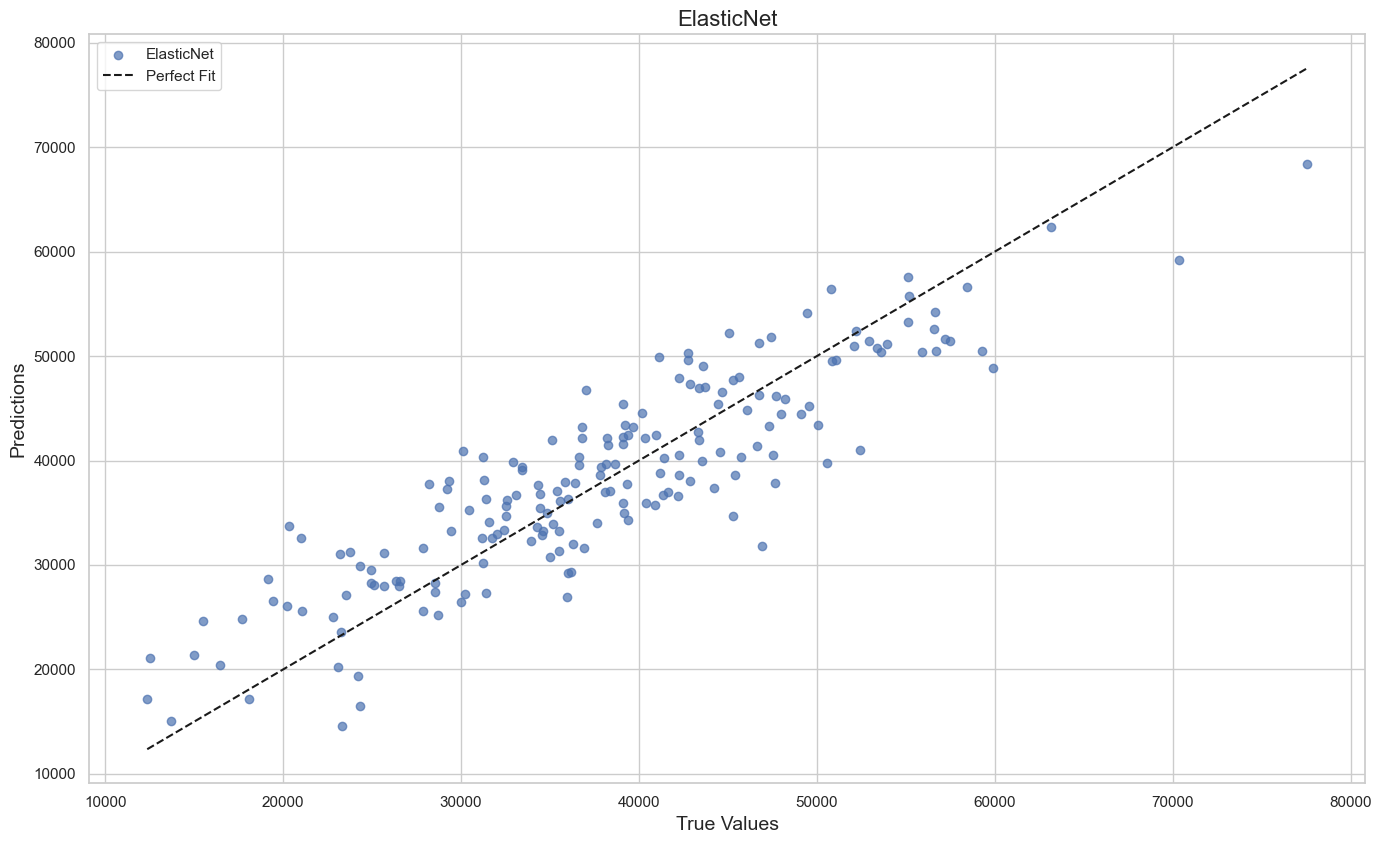

In [10]:
'''对比多元线性回归、Lasso、Ridge、弹性网络'''
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(r'D:\物联网人工智能\实验1\sales_advert\sales_advert.csv')
data = data.dropna()
le = LabelEncoder()
data['event'] = le.fit_transform(data['event'])
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

param_grid = {
    "Lasso": {'alpha': np.logspace(-4, 4, 100)},
    "Ridge": {'alpha': np.logspace(-4, 4, 100)},
    "ElasticNet": {
        'alpha': np.logspace(-4, 4, 100),
        'l1_ratio': np.linspace(0.01, 1.0, 100)
    }
}

results = {}

predictions_df = pd.DataFrame({'True Values': y_test})

# 对每个模型进行训练、网格搜索和评估
for model_name, model in models.items():
    print(f"\n正在训练 {model_name} 模型...")

    grid_search = GridSearchCV(model, param_grid.get(model_name, {}), cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print(f"最佳参数：{best_params}")

    best_model = grid_search.best_estimator_
    model_pred = best_model.predict(X_test_scaled)

    predictions_df[f'{model_name} Predictions'] = model_pred

    mae = mean_absolute_error(y_test, model_pred)
    mse = mean_squared_error(y_test, model_pred)
    r2 = r2_score(y_test, model_pred)

    results[model_name] = {
        "Best Params": best_params,
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }

    plt.figure(figsize=(14, 8.6))
    plt.scatter(y_test, model_pred, label=model_name, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Perfect Fit")
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predictions', fontsize=14)
    plt.title(f"{model_name}", fontsize=16)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{model_name}_advertising.png', dpi=600)  # 使用模型名称作为文件名

predictions_df.to_csv('model_predictions_advertising.csv', index=False)

results_df = pd.DataFrame(results).T
print(results_df)

MCP Regression Metrics:
MAE: 4301.1321, MSE: 27213386.7920, R²: 0.7858


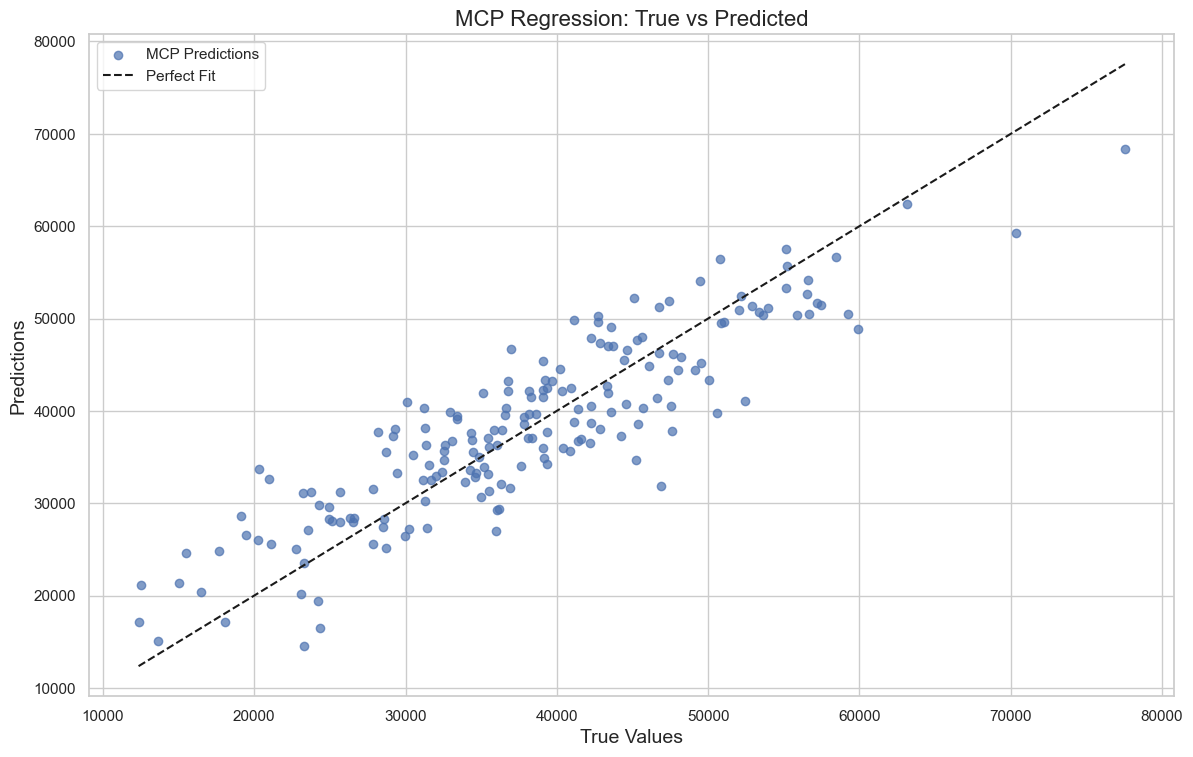

In [11]:
'''MCP惩罚项'''


class MCPRegressor:
    def __init__(self, lambda_=1.0, gamma=2.0, max_iter=1000, tol=1e-4):
        if gamma <= 1:
            raise ValueError("gamma must be greater than 1.")
        self.lambda_ = lambda_
        self.gamma = gamma
        self.max_iter = max_iter
        self.tol = tol
        self.w = None
        self.intercept_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.intercept_ = np.mean(y)
        r = y - self.intercept_  # Initial residual

        for it in range(self.max_iter):
            w_prev = self.w.copy()
            for j in range(n_features):
                # Compute residual considering current coefficient
                r_j = r + X[:, j] * self.w[j]
                z_j = X[:, j].dot(r_j) / n_samples

                # Apply MCP thresholding
                abs_zj = np.abs(z_j)
                sign_zj = np.sign(z_j)

                if abs_zj <= self.lambda_:
                    new_w_j = 0.0
                elif abs_zj <= self.gamma * self.lambda_:
                    new_w_j = (z_j - sign_zj * self.lambda_) / (1 - 1 / self.gamma)
                else:
                    new_w_j = z_j

                # Update residual and coefficient
                delta = new_w_j - self.w[j]
                r -= X[:, j] * delta
                self.w[j] = new_w_j

            # Update intercept
            new_intercept = np.mean(y - X.dot(self.w))
            delta_intercept = new_intercept - self.intercept_
            r -= delta_intercept
            self.intercept_ = new_intercept

            # Check convergence
            max_change = np.max(np.abs(self.w - w_prev))
            if max_change < self.tol:
                break

    def predict(self, X):
        return X.dot(self.w) + self.intercept_

# Train MCP model
mcp = MCPRegressor(lambda_=0.1, gamma=3.0)
mcp.fit(X_train_scaled, y_train)
mcp_pred = mcp.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, mcp_pred)
mse = mean_squared_error(y_test, mcp_pred)
r2 = r2_score(y_test, mcp_pred)
print(f"MCP Regression Metrics:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Visualize
plt.figure(figsize=(14, 8.6))
plt.scatter(y_test, mcp_pred, alpha=0.7, label='MCP Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='Perfect Fit')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.title('MCP Regression: True vs Predicted', fontsize=16)
plt.legend()
plt.savefig(r'MCP_sales_advert.png', dpi=600)
plt.show()

# 导出预测值和真实值到CSV文件
mcp_predictions_df = pd.DataFrame({
    'True Values': y_test,
    'MCP Predictions': mcp_pred
})
mcp_predictions_df.to_csv('mcp_predictions_advertising.csv', index=False)

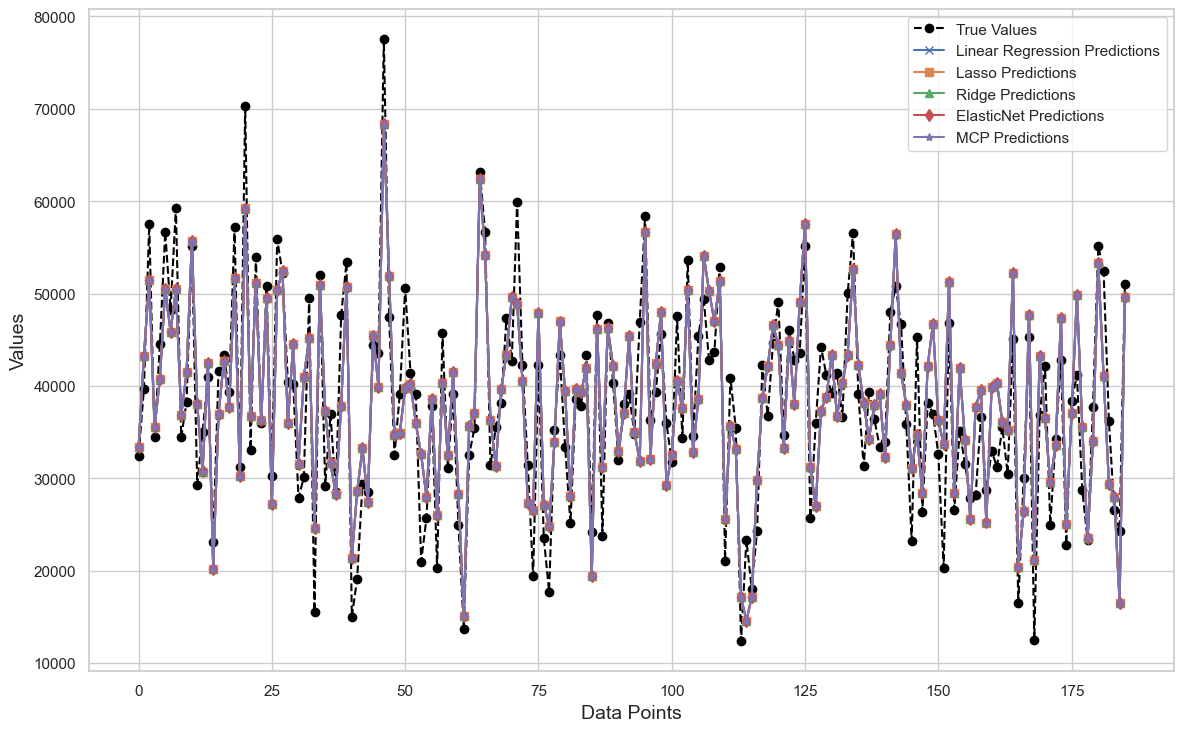

In [12]:
'''预测值真实值对比'''
file_path = 'compare_predictions.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 提取数据
true_values = df.iloc[:, 0]
linear_predictions = df.iloc[:, 1]
lasso_predictions = df.iloc[:, 2]
ridge_predictions = df.iloc[:, 3]
elasticnet_predictions = df.iloc[:, 4]
mcp_predictions = df.iloc[:, 5]

# 绘制图形
plt.figure(figsize=(14, 8.6))

# 绘制真实值
plt.plot(true_values, label='True Values', color='black', marker='o', linestyle='--')

# 绘制各个模型的预测值
plt.plot(linear_predictions, label='Linear Regression Predictions', marker='x')
plt.plot(lasso_predictions, label='Lasso Predictions', marker='s')
plt.plot(ridge_predictions, label='Ridge Predictions', marker='^')
plt.plot(elasticnet_predictions, label='ElasticNet Predictions', marker='d')
plt.plot(mcp_predictions, label='MCP Predictions', marker='*')

# 添加标题和标签
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Values', fontsize=14)

# 添加图例
plt.legend()
plt.savefig(r'compare_sales_advert.png', dpi=600)
plt.show()

In [114]:
'''随机森林调参'''
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate

print(optuna.__version__)
from sklearn.ensemble import RandomForestRegressor as RFR

data = pd.read_csv(r'D:\物联网人工智能\实验1\sales_advert\sales_advert.csv')
data = data.dropna()
le = LabelEncoder()
data['event'] = le.fit_transform(data['event'])
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def optuna_objective(trial):
    # 定义参数空间
    n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
    max_depth = trial.suggest_int('max_depth', 10, 100, 1)
    max_features = trial.suggest_int('max_features', 10, 100, 1)
    min_impurtity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 5.0, step=0.1)

    # 定义评估器
    reg = RFR(n_estimators=n_estimators,
              max_depth=max_depth,
              max_features=max_features,
              min_impurity_decrease=min_impurtity_decrease,
              random_state=42,
              verbose=False,
              n_jobs=-1)

    # 定义交叉过程，输出负均方误差
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    validation_loss = cross_validate(reg, X_train, y_train,
                                     scoring='neg_mean_squared_error',
                                     cv=cv,
                                     verbose=True,
                                     n_jobs=-1,
                                     error_score='raise')
    return np.mean(validation_loss['test_score'])


def optimizer_optuna(n_trials, algo):
    # 定义使用TPE或GP
    if algo == 'TPE':
        algo = optuna.samplers.TPESampler(n_startup_trials=20, n_ei_candidates=30)
    elif algo == 'GP':
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator': 'GP',
                                          'n_initial_points': 10,
                                          'acq_func': 'EI'})
    study = optuna.create_study(sampler=algo, direction='maximize')
    study.optimize(optuna_objective, n_trials=n_trials, show_progress_bar=True)

    print('best_params:', study.best_trial.params,
          'best_score:', study.best_trial.values,
          '\n')

    return study.best_trial.params, study.best_trial.values


import warnings

warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before trails')
optuna.logging.set_verbosity(optuna.logging.ERROR)
best_params, best_score = optimizer_optuna(100, 'TPE')

4.2.1


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\1464398065.py:21: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\1464398065.py:22: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 10, 100, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\1464398065.py:23: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_features = trial.suggest_int('max_features', 10, 100, 1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Par

best_params: {'n_estimators': 411, 'max_depth': 90, 'max_features': 76, 'min_impurity_decrease': 3.4000000000000004} best_score: [-36919051.65723159] 



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [115]:
'''决策树调参'''
from sklearn.tree import DecisionTreeRegressor as DTR


def optuna_objective(trial):
    # 定义参数空间
    max_depth = trial.suggest_int('max_depth', 10, 100, 1)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50, 1)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 5.0, step=0.1)

    # 定义评估器
    reg = DTR(max_depth=max_depth,
              min_samples_split=min_samples_split,
              min_samples_leaf=min_samples_leaf,
              min_impurity_decrease=min_impurity_decrease,
              random_state=42)

    # 定义交叉过程，输出负均方误差
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    validation_loss = cross_validate(reg, X_train, y_train,
                                     scoring='neg_mean_squared_error',
                                     cv=cv,
                                     verbose=True,
                                     n_jobs=-1,
                                     error_score='raise')
    return np.mean(validation_loss['test_score'])


def optimizer_optuna(n_trials, algo):
    # 定义使用TPE或GP
    if algo == 'TPE':
        algo = optuna.samplers.TPESampler(n_startup_trials=20, n_ei_candidates=30)
    elif algo == 'GP':
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator': 'GP',
                                          'n_initial_points': 10,
                                          'acq_func': 'EI'})
    study = optuna.create_study(sampler=algo, direction='maximize')
    study.optimize(optuna_objective, n_trials=n_trials, show_progress_bar=True)

    print('best_params:', study.best_trial.params,
          'best_score:', study.best_trial.values,
          '\n')

    return study.best_trial.params, study.best_trial.values


import warnings

warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before trails')
optuna.logging.set_verbosity(optuna.logging.ERROR)
best_params, best_score = optimizer_optuna(100, 'TPE')

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\2266695459.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 10, 100, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\2266695459.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_samples_split = trial.suggest_int('min_samples_split', 2, 50, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\2266695459.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50, 1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent wo

best_params: {'max_depth': 86, 'min_samples_split': 11, 'min_samples_leaf': 4, 'min_impurity_decrease': 1.1} best_score: [-55044263.96708129] 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [116]:
'''XGBoost调参'''
from xgboost import XGBRegressor


def optuna_objective(trial):
    # 定义参数空间
    n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
    max_depth = trial.suggest_int('max_depth', 3, 200, 1)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 5)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 5)

    # 定义评估器
    reg = XGBRegressor(n_estimators=n_estimators,
                       max_depth=max_depth,
                       learning_rate=learning_rate,
                       subsample=subsample,
                       colsample_bytree=colsample_bytree,
                       gamma=gamma,
                       reg_alpha=reg_alpha,
                       reg_lambda=reg_lambda,
                       random_state=42,
                       n_jobs=-1)

    # 定义交叉过程，输出负均方误差
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    validation_loss = cross_validate(reg, X_train, y_train,
                                     scoring='neg_mean_squared_error',
                                     cv=cv,
                                     verbose=True,
                                     n_jobs=-1,
                                     error_score='raise')
    return np.mean(validation_loss['test_score'])


def optimizer_optuna(n_trials, algo):
    # 定义使用TPE或GP
    if algo == 'TPE':
        algo = optuna.samplers.TPESampler(n_startup_trials=20, n_ei_candidates=30)
    elif algo == 'GP':
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator': 'GP',
                                          'n_initial_points': 10,
                                          'acq_func': 'EI'})
    study = optuna.create_study(sampler=algo, direction='maximize')
    study.optimize(optuna_objective, n_trials=n_trials, show_progress_bar=True)

    print('best_params:', study.best_trial.params,
          'best_score:', study.best_trial.values,
          '\n')

    return study.best_trial.params, study.best_trial.values


import warnings

warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before trails')
optuna.logging.set_verbosity(optuna.logging.ERROR)
best_params, best_score = optimizer_optuna(100, 'TPE')

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\3556445941.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\3556445941.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 3, 200, 1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

best_params: {'n_estimators': 323, 'max_depth': 3, 'learning_rate': 0.03808822501333059, 'subsample': 0.6205189678275249, 'colsample_bytree': 0.5009839171458447, 'gamma': 2.078172500586758, 'reg_alpha': 2.941456512796938, 'reg_lambda': 0.9013462151181098} best_score: [-30961415.59844602] 



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [117]:
'''LightGBM调参'''
from lightgbm import LGBMRegressor


def optuna_objective(trial):
    # 定义参数空间
    n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
    max_depth = trial.suggest_int('max_depth', 3, 200, 1)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    num_leaves = trial.suggest_int('num_leaves', 20, 200)
    min_child_samples = trial.suggest_int('min_child_samples', 1, 100)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 5)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 5)

    # 定义评估器
    reg = LGBMRegressor(n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        num_leaves=num_leaves,
                        min_child_samples=min_child_samples,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        reg_alpha=reg_alpha,
                        reg_lambda=reg_lambda,
                        random_state=42,
                        n_jobs=-1)

    # 定义交叉过程，输出负均方误差
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    validation_loss = cross_validate(reg, X_train, y_train,
                                     scoring='neg_mean_squared_error',
                                     cv=cv,
                                     verbose=True,
                                     n_jobs=-1,
                                     error_score='raise')
    return np.mean(validation_loss['test_score'])


def optimizer_optuna(n_trials, algo):
    # 定义使用TPE或GP
    if algo == 'TPE':
        algo = optuna.samplers.TPESampler(n_startup_trials=20, n_ei_candidates=30)
    elif algo == 'GP':
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator': 'GP',
                                          'n_initial_points': 10,
                                          'acq_func': 'EI'})
    study = optuna.create_study(sampler=algo, direction='maximize')
    study.optimize(optuna_objective, n_trials=n_trials, show_progress_bar=True)

    print('best_params:', study.best_trial.params,
          'best_score:', study.best_trial.values,
          '\n')

    return study.best_trial.params, study.best_trial.values


import warnings

warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before trails')
optuna.logging.set_verbosity(optuna.logging.ERROR)
best_params, best_score = optimizer_optuna(100, 'TPE')

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\2812657003.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 10, 500, 1)
C:\Users\ChuantaoLi\AppData\Local\Temp\ipykernel_10060\2812657003.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 3, 200, 1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

best_params: {'n_estimators': 313, 'max_depth': 200, 'learning_rate': 0.032482258690291615, 'num_leaves': 105, 'min_child_samples': 39, 'subsample': 0.6546806423792024, 'colsample_bytree': 0.5354158889469068, 'reg_alpha': 3.8494401554172235, 'reg_lambda': 4.687621689060061} best_score: [-33260775.34432616] 



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [120]:
'''各模型预测对比'''
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 定义模型
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=86, min_samples_split=11, min_samples_leaf=4, min_impurity_decrease=1.1),
    "Random Forest": RandomForestRegressor(n_estimators=411, max_depth=90, max_features=76, min_impurity_decrease=3.4, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=323, max_depth=3, learning_rate=0.03808822501333059, subsample=0.6205189678275249, colsample_bytree=0.5009839171458447,
                            gamma=2.078172500586758, reg_alpha=2.941456512796938, reg_lambda=0.9013462151181098, random_state=42, n_jobs=-1),
    "LightGBM": LGBMRegressor(n_estimators=313, max_depth=200, learning_rate=0.032482258690291615, num_leaves=105, min_child_samples=39, subsample=0.6546806423792024,
                              colsample_bytree=0.5354158889469068, reg_alpha=3.8494401554172235, reg_lambda=4.687621689060061, random_state=42, n_jobs=-1)
}

# 训练模型并计算指标
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R²": round(r2, 4)
    })

# 输出结果
results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 743, number of used features: 6
[LightGBM] [Info] Start training from score 38601.548122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,